In [12]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [13]:
# importing data and creating a dataset without outliers
data = np.genfromtxt("winequality-white.csv", delimiter=";", skip_header=1)
data_out = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data = np.array(data)

# defining our datasets
X = data[:,0:-1]
X_out = data_out[:,0:-1]
y = data[:, -1]
y_out = data_out[:, -1]

In [14]:
# defining our variables for cvxpy
n = X.shape[1]
B1 = cvx.Variable(n)
B2 = cvx.Variable(n)
B3 = cvx.Variable(n)
B4 = cvx.Variable(n)

# defining the cost functions depending on the norm and dataset
obj1 = cvx.Minimize(cvx.norm(X@B1 - y, 1))
obj2 = cvx.Minimize(cvx.norm(X @ B2 - y, 2))
obj1_out = cvx.Minimize(cvx.norm(X_out@B3 - y_out, 1))
obj2_out = cvx.Minimize(cvx.norm(X_out@B4 - y_out, 2))

# setting the problems in cvxpy
prob1 = cvx.Problem(obj1)
prob2 = cvx.Problem(obj2)
prob1_out = cvx.Problem(obj1_out)
prob2_out = cvx.Problem(obj2_out)

# solving the problems
prob1.solve()
prob2.solve()
prob1_out.solve()
prob2_out.solve()

# printing the estimators for each problem
print("Optimal value for L-1:  ", B1.value)
print("Optimal value for L-1 (with outliers removed):  ", B3.value)
print("Optimal value for L-2:  ", B2.value)
print("Optimal value for L-2 (with outliers removed):  ", B4.value)

# relative change (to determine robustness to outliers)
rel_change1 = (B3.value - B1.value) / B1.value #see how much L1 changes
rel_change2 = (B4.value - B2.value) / B2.value #see how much L2 changes
print('L1 difference from outliers:', rel_change1, '\nL2 difference from outliers:', rel_change2)
print('Normed value of L1 and L2 difference vectors:', 'L1:', np.linalg.norm(rel_change1), 'L2:', np.linalg.norm(rel_change2))

Optimal value for L-1:   [-2.89801820e-02 -2.07462350e+00 -1.65467288e-01  2.72708582e-02
 -1.74214507e+00  5.33818771e-03 -9.12684027e-04  1.15692042e+00
  3.97386730e-01  5.59358349e-01  3.64033370e-01]
Optimal value for L-1 (with outliers removed):   [-7.38108346e-03 -1.91520550e+00  3.26969989e-02  2.88229568e-02
 -6.32630212e+00  6.16657734e-03 -9.45618573e-04  7.40971906e-01
  5.12398144e-01  6.69022989e-01  3.55596180e-01]
Optimal value for L-2:   [-5.05906677e-02 -1.95851041e+00 -2.93489981e-02  2.49883934e-02
 -9.42583777e-01  4.79078528e-03 -8.77630526e-04  2.04204660e+00
  1.68395150e-01  4.16453142e-01  3.65633386e-01]
Optimal value for L-2 (with outliers removed):   [-2.50063860e-02 -1.77077832e+00 -2.35269917e-02  2.63260778e-02
 -5.27053607e+00  6.03682640e-03 -6.88683169e-04  1.59675718e+00
  3.07159541e-01  4.23342639e-01  3.55451762e-01]
L1 difference from outliers: [-0.74530583 -0.07684189 -1.197604    0.05691418  2.63132912  0.15518181
  0.03608538 -0.35953079  0.28

Text(0.5, 0, 'Feature')

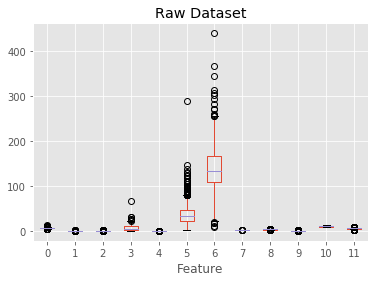

In [15]:
# visualizing the raw dataset and its outliers per column (feature)
pd.DataFrame(data).plot(kind='box')
plt.title('Raw Dataset')
plt.xlabel('Feature')

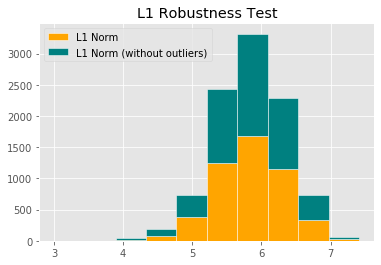

In [18]:
# Plotting predictions
plt.title('L1 Robustness Test')
plt.hist([X @ B1.value, X @ B3.value], bins=10, ec='white', color=['orange', 'teal'], label=['L1 Norm','L1 Norm (without outliers)'], stacked=True)
plt.legend()

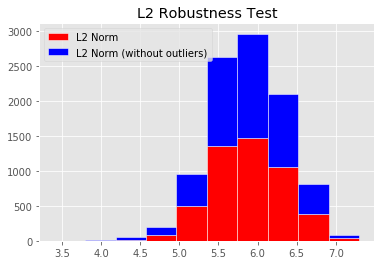

In [19]:
plt.title('L2 Robustness Test')
plt.hist([X@B2.value, X @ B4.value], bins = 10, ec='white', color=['red', 'blue'],label=['L2 Norm','L2 Norm (without outliers)'], stacked=True)
plt.legend()